la finestra di viviani è una curva ottenuta dall'intersezione di una sfera con un cilindro, con lo raggio dalla sfera uguale allo diametro del cilindro.

In [30]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

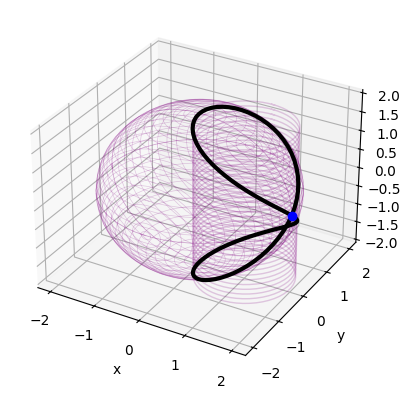

In [31]:
def viviani(ax):
    a = 1
    n = 100
    t = np.linspace(0, 4 * np.pi, n)
    x = a * (1 + np.cos(t))
    y = a * np.sin(t)
    z = 2 * a * np.sin(t / 2)
    ng = n // 2 + 1
    theta = t[:ng]
    for phi in np.linspace(-np.pi, np.pi, 32):
        ax.plot(2 * a * np.sin(theta) * np.cos(phi), 2 * a * np.cos(theta) * np.cos(phi),
                2 * a * np.sin(phi), 'purple', alpha=0.2, lw=0.5)
        ax.plot(2 * a * np.cos(theta) * np.cos(phi), [2 * a * np.sin(phi)] * ng,
                2 * a * np.sin(theta) * np.cos(phi), 'purple', alpha=0.2, lw=0.5)
        ax.plot(a * np.sin(theta) + a, a * np.cos(theta), 2 * a * phi / np.pi,
                'purple', alpha=0.2, lw=1)

    curve, = ax.plot(x, y, z, 'k', lw=3)
    return curve

def grid(ax):
    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

def update(frame, curve, ball):
    ball.set_data([curve._verts3d[0][frame]], [curve._verts3d[1][frame]])
    ball.set_3d_properties([curve._verts3d[2][frame]])
    return ball,

def plot_combined():
    fig = plt.figure(figsize=plt.figaspect(1.))
    ax = fig.add_subplot(111, projection='3d')

    curve = viviani(ax)
    grid(ax)
    ball, = ax.plot([curve._verts3d[0][0]], [curve._verts3d[1][0]], [curve._verts3d[2][0]], 'bo')
    ani = animation.FuncAnimation(fig, update, frames=len(curve._verts3d[0]), fargs=(curve, ball),
                                  blit=True, interval=10, repeat=False)

    plt.show()
plot_combined()